# Ensemble Learning and Random Forest

In this notebook implements the ensemble learning using the sklearn inbuilt dataset. The following methods are used in this notebook: 
* Random Forest

* Hard voting classifier with Multilayer Perceptron, Logistic Regression, and Random Forest. 

* Bagging strategy with Multiple decision trees. 

#### Dataset

[sklearn library datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets), [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) is used to make two interleaving half circles.

#### Goal

Use the three ensemble learning approaches to classify the two labels from make_moons dataset.


#### Tools

The following libraries are used in the notebook: 

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) in [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier), [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html?highlight=votingclassifier#sklearn.ensemble.VotingClassifier), and [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html?highlight=baggingclassifier#sklearn.ensemble.BaggingClassifier) in [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression) in [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier) in [sklearn.neural_network](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network)
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier) in [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score) in [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

The data, [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html), is loaded from [sklearn.dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets).

In [1]:
# Import required libraries
import matplotlib.pyplot as plt 
import numpy as np

# Import the tools from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons

---
### Data Pre-Processing

After loading the data,  pre-process the data. 

Plot the scatter plot to look at the distribution of the data.

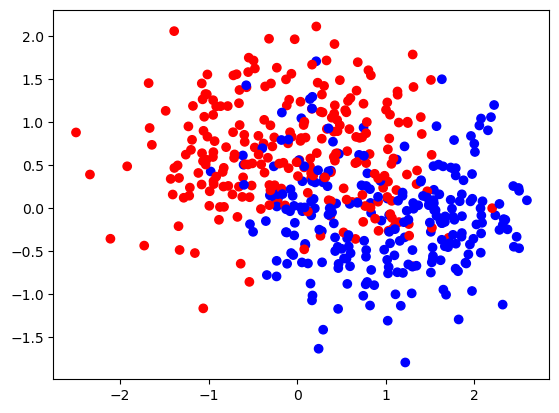

In [4]:
# Scatter plot for the dataset
X, y = make_moons(n_samples= 500, noise = .50, random_state = 20)
colors = ["blue" if label == 1 else "red" for label in y]
plt.scatter(X[:, 0], X[:, 1], c = colors)

## Split into Train and Test data

Use sklearn library train_test_split function to split into "training" and "test" data.

In [5]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

---

### Random Forest

From [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) use [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [6]:
# Train the training set
clf = RandomForestClassifier(random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [7]:
# Output the mean accuracy on the given test data and labels
clf.score(X_test, y_test)

0.832

Random forest has an accuracy of 0.832 on the test data. 

---

### Ensemble learning 1

In the following section, Multilayer Perceptron, Logistic Regression, and Random Forest algorithms are combined and to select the final prediction hard voting classifier is used. The prediction results of individual algorithms are compared with the ensemble model. 

In [8]:
# Set up ensemble learners with hard voting classifier
log_clf = LogisticRegression()
mlp_clf = MLPClassifier()
rand_clf = RandomForestClassifier()

voting_clf = VotingClassifier([('lr', log_clf), 
                               ('mlp', mlp_clf), 
                               ('rf', rand_clf)], voting = 'hard')

In [9]:
# Train the training set
voting_clf.fit(X_train, y_train)

c:\Users\ppraveen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('mlp', MLPClassifier()),
                             ('rf', RandomForestClassifier())])

In [10]:
# Fit 3 models and the ensemble model, and print the accuracy
for clf in [log_clf, mlp_clf, rand_clf, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f'{clf.__class__.__name__}, accuracy score = {accuracy_score(y_test, y_pred)}')    

LogisticRegression, accuracy score = 0.824


c:\Users\ppraveen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier, accuracy score = 0.848
RandomForestClassifier, accuracy score = 0.84
VotingClassifier, accuracy score = 0.832


c:\Users\ppraveen\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The MLP and Random forest have slightly higher accuracy than the ensemble model on test data.

---

### Ensemble learning 2

Following section implements multiple decision trees using bagging classifier. 


In [11]:
# Set up the ensemble model
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap = True, 
                            n_jobs = -1)

In [12]:
# Train using training set
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [13]:
# Predict the test data
y_pred = bag_clf.predict(X_test)

# Calculate the accuracy
accuracy_score(y_test, y_pred)

0.856

Compare results with the individual decision tree model!

In [14]:
# Set up the decision tree and train using training set
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# Predict using test data and calculate the accuracy
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.776


The ensemble model with bagging classifier has higher accuracy than the individual decision tree model. Thus, in our context ensemble model does a better job of predicting than the individual decision tree model. 